In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('tripadvisor_review.csv')
data.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [3]:
data.shape

(980, 11)

In [4]:
data.dtypes

User ID         object
Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
dtype: object

In [5]:
data.isnull().sum()

User ID        0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
dtype: int64

In [6]:
data.drop(['User ID'],1,inplace=True)

In [7]:
from sklearn.preprocessing import normalize
df1 = normalize(data)
df1

array([[0.14123565, 0.27335932, 0.3477738 , ..., 0.42370694, 0.27639664,
        0.36751641],
       [0.14205439, 0.30639183, 0.37045557, ..., 0.3662775 , 0.25904036,
        0.32310411],
       [0.21894691, 0.14357174, 0.09691093, ..., 0.5025011 , 0.23509873,
        0.4486617 ],
       ...,
       [0.10101262, 0.21858469, 0.11094829, ..., 0.46532044, 0.22189658,
        0.50009528],
       [0.17684476, 0.03803113, 0.02472023, ..., 0.56666385, 0.21297433,
        0.46778291],
       [0.15503101, 0.09335201, 0.18837101, ..., 0.47842903, 0.22337801,
        0.40008002]])

In [8]:
df = pd.DataFrame(df1,columns=data.columns)
df.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.141236,0.273359,0.347774,0.094157,0.121493,0.367516,0.484453,0.423707,0.276397,0.367516
1,0.142054,0.306392,0.370456,0.089132,0.197762,0.442875,0.447054,0.366278,0.259040,0.323104
2,0.218947,0.143572,0.096911,0.095116,0.043072,0.276376,0.570698,0.502501,0.235099,0.448662
3,0.075113,0.300451,0.048406,0.095143,0.076782,0.253714,0.530797,0.494075,0.262060,0.477383
4,0.085531,0.201250,0.197896,0.095594,0.258271,0.338771,0.533312,0.466229,0.197896,0.425979


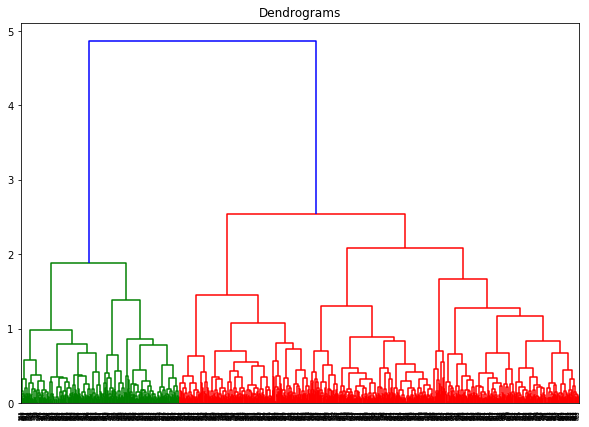

In [9]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

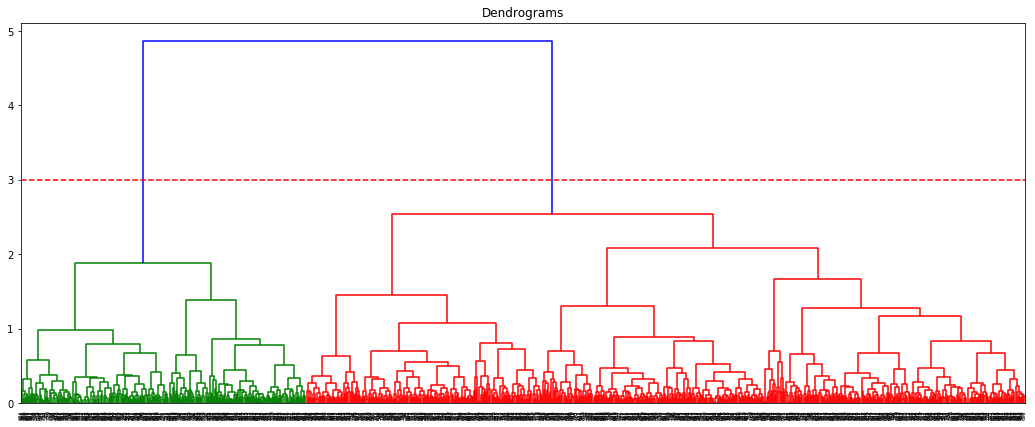

In [10]:
plt.figure(figsize=(18, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=3, color='r', linestyle='--')

In [11]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

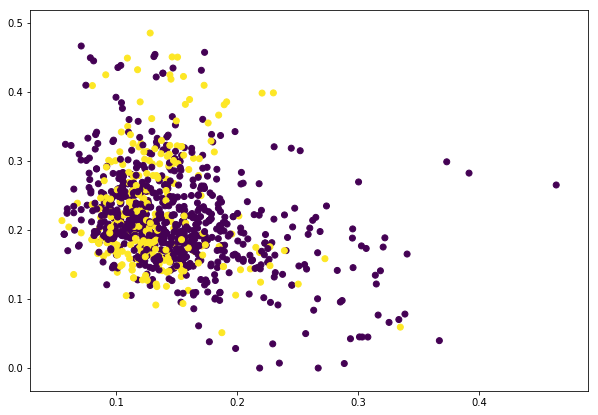

In [12]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['Category 1'], df['Category 2'], c=cluster.labels_) 

In [13]:
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 

In [74]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(data)
X_scaled

array([[ 0.11264465,  0.93588703,  1.6197497 , ..., -0.32787224,
         0.68751758, -1.18059095],
       [ 0.38808847,  1.77264397,  2.08917107, ..., -1.49205628,
         0.797274  , -1.49190812],
       [ 1.00018585, -1.15600533, -0.60048651, ..., -0.25511074,
        -0.71187679, -0.93153721],
       ...,
       [-0.86671115, -0.06822131, -0.43555468, ..., -0.18234924,
        -0.62955947,  0.68731207],
       [ 0.11264465, -2.41114075, -1.12065614, ...,  1.05459631,
        -1.23321978, -1.05606408],
       [ 0.11264465, -1.6580595 ,  0.14805027, ...,  0.25421978,
        -0.62955947, -1.24285439]])

In [73]:
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
X_normalized

,0,1,2,3,4,5,6,7,8,9
0,0.039400,0.327346,0.566541,0.109464,-0.111789,0.374314,0.405264,-0.114680,0.240473,-0.412936
1,0.066501,0.303753,0.357992,0.065885,0.188232,0.424877,0.636767,-0.255673,0.136618,-0.255647
2,0.377270,-0.436046,-0.226504,-0.003373,-0.603696,-0.211869,-0.045280,-0.096228,-0.268520,-0.351376
3,-0.553056,0.381600,-0.374169,0.054689,-0.447403,-0.244146,-0.048946,0.370667,0.000628,0.077146
4,-0.500025,-0.136117,0.090170,0.057187,0.585381,0.140025,-0.051181,-0.170817,-0.455608,-0.344082
...,...,...,...,...,...,...,...,...,...,...
975,-0.163403,-0.169590,-0.315403,-0.003116,-0.047618,-0.299167,-0.487489,-0.139629,-0.554122,0.434843
976,0.623210,-0.516475,0.077252,-0.311287,-0.208508,-0.172396,-0.068508,-0.187118,-0.359292,0.001378
977,-0.402750,-0.031702,-0.202397,-0.170359,0.382910,-0.054200,-0.649977,-0.084736,-0.292549,0.319386
978,0.025014,-0.535418,-0.248853,-0.081409,-0.324925,-0.594163,-0.026656,0.234184,-0.273849,-0.234510


In [16]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

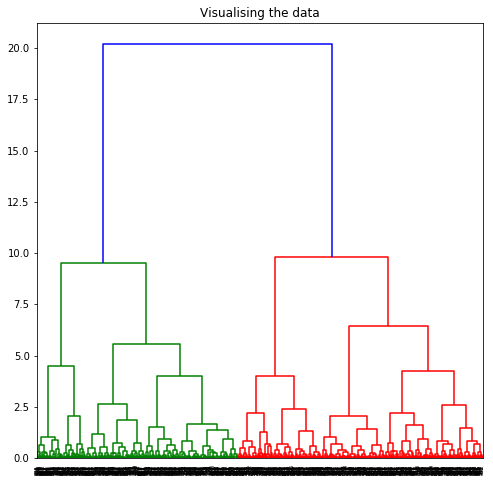

In [17]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

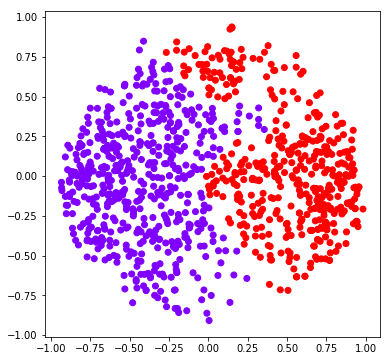

In [18]:
#k=2
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

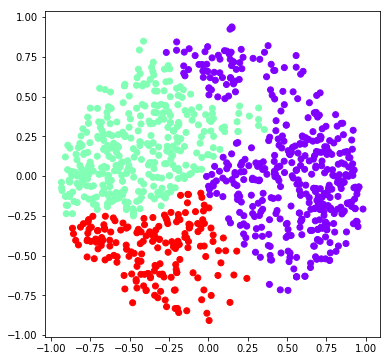

In [19]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

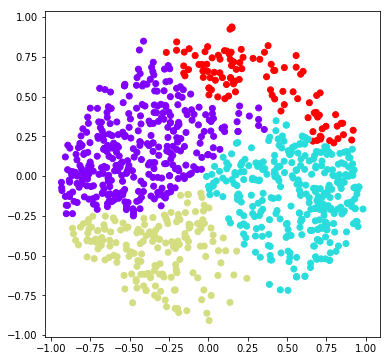

In [20]:
ac4 = AgglomerativeClustering(n_clusters = 4) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

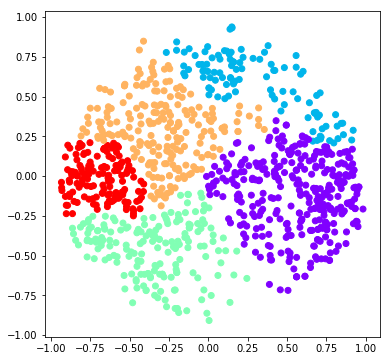

In [21]:
ac5 = AgglomerativeClustering(n_clusters = 5) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac5.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

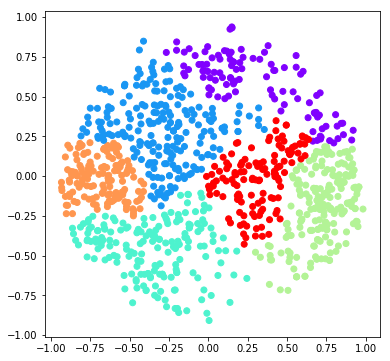

In [22]:
ac6 = AgglomerativeClustering(n_clusters = 6) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac6.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

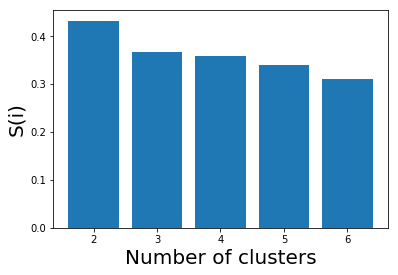

In [23]:
k = [2, 3, 4, 5, 6] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac6.fit_predict(X_principal))) 
  
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 


## Other method

In [25]:
df = pd.read_csv('tripadvisor_review.csv')
df.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [26]:
df.drop(['User ID'],1,inplace=True)

In [27]:
df.shape

(980, 10)

In [28]:
df.dtypes

Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
dtype: object

In [29]:
df.isnull().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
dtype: int64

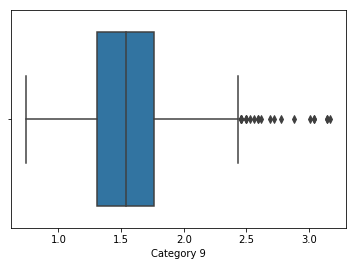

In [58]:
sns.boxplot(df['Category 9']);

In [41]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR)
LL = Q1 - 1.5*(IQR)

In [42]:
UL

Category 1     1.54500
Category 2     2.28000
Category 3     3.52625
Category 4     0.83500
Category 5     2.04000
Category 6     3.31000
Category 7     3.18000
Category 8     3.16500
Category 9     2.43500
Category 10    3.79000
dtype: float64

In [43]:
LL

Category 1     0.14500
Category 2     0.36000
Category 3    -1.68375
Category 4     0.15500
Category 5    -0.20000
Category 6     0.35000
Category 7     3.18000
Category 8     2.48500
Category 9     0.63500
Category 10    1.79000
dtype: float64

In [59]:
df.loc[df['Category 1']>1.54500,'Category 1'] = 1.54500
df.loc[df['Category 2']>2.28000,'Category 2'] = 2.28000
df.loc[df['Category 2']<0.36000,'Category 2'] = 0.36000
df.loc[df['Category 3']>3.52625,'Category 3'] = 3.52625
df.loc[df['Category 4']>0.83500,'Category 4'] = 0.83500
df.loc[df['Category 5']>2.04000,'Category 5'] = 2.04000
df.loc[df['Category 6']>3.31000,'Category 6'] = 3.31000
df.loc[df['Category 6']<0.35000,'Category 6'] = 0.35000
df.loc[df['Category 7']>3.18000,'Category 7'] = 3.18000
df.loc[df['Category 7']<3.18000,'Category 7'] = 3.18000
df.loc[df['Category 8']>3.16500,'Category 8'] = 3.16500
df.loc[df['Category 8']>2.48500,'Category 8'] = 2.48500
df.loc[df['Category 9']>2.43500,'Category 9'] = 2.43500

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(df)
df_scale = normalize(df_scale) 


In [77]:
from sklearn.cluster import KMeans
num_of_cluster = range(1,8)
wcss = []
for k in num_of_cluster:
    model = KMeans(n_clusters=k, random_state=15)
    model.fit(df_scale)
    wcss.append(model.inertia_)

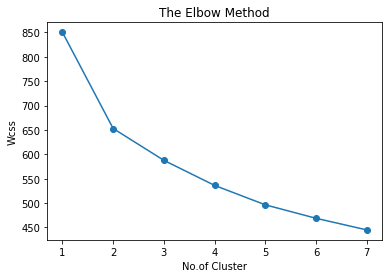

In [78]:
plt.plot(num_of_cluster,wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('No.of Cluster')
plt.ylabel('Wcss') 
plt.show()

In [79]:
from sklearn.metrics import silhouette_score 
num_of_cluster = list(range(2,8))
shc_list = []
for k in num_of_cluster:
    model = KMeans(n_clusters=k, random_state=15)
    cluster_labels= model.fit_predict(df_scale)
    shc_list.append(silhouette_score(df_scale,cluster_labels))
num_of_cluster.insert(0,1)
shc_list.insert(0,0)

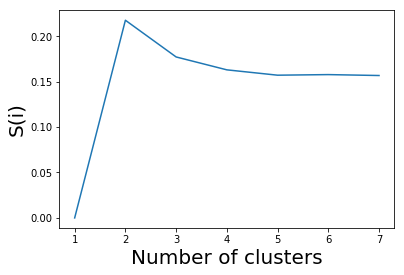

In [80]:
plt.plot(num_of_cluster,shc_list)
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

In [81]:
model = KMeans(n_clusters=2, random_state=15)
cluster_labels=model.fit_predict(df_scale)
df['Cluster'] = cluster_labels

In [82]:
df.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Cluster
0,0.93,1.8,2.29,0.62,0.80,2.42,3.18,2.485,1.82,2.42,1
1,1.02,2.2,2.66,0.64,1.42,3.18,3.18,2.485,1.86,2.32,1
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.485,1.31,2.50,0
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.485,1.57,2.86,0
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.485,1.18,2.54,1


In [83]:
df.groupby('Cluster').mean()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
Cluster,,,,,,,,,,
0,0.872747,1.277899,0.589879,0.427121,0.718101,1.492465,3.18,2.484990,1.529141,3.014081
1,0.882485,1.394969,1.445271,0.577866,1.153856,2.199856,3.18,2.484866,1.597588,2.579938


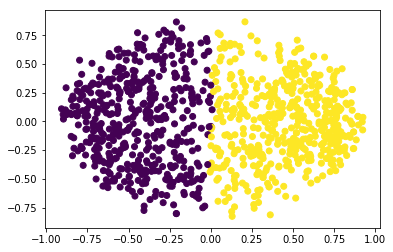

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(df_scale)
plt.scatter(pca[:,0],pca[:,1],c=cluster_labels);